# Task 3 -- Car Price Prediction

In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [2]:
car= pd.read_csv("C:\\Users\\siddu\\OneDrive\\Documents\\oasis\\CarPrice.csv")
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Preliminary Data Inspection

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# preprocessing data

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
car['CarName'] = label_encoder.fit_transform(car['CarName'])
car['car_ID'] = label_encoder.fit_transform(car['car_ID'])
car['price'] = label_encoder.fit_transform(car['price'])
car['CarName'] = label_encoder.fit_transform(car['CarName'])
car['fueltype'] = label_encoder.fit_transform(car['fueltype'])
car['aspiration'] = label_encoder.fit_transform(car['aspiration'])
car['doornumber'] = label_encoder.fit_transform(car['doornumber'])
car['carbody'] = label_encoder.fit_transform(car['carbody'])
car['drivewheel'] = label_encoder.fit_transform(car['drivewheel'])
car['enginelocation'] = label_encoder.fit_transform(car['enginelocation'])
car['enginetype'] = label_encoder.fit_transform(car['enginetype'])
car['cylindernumber'] = label_encoder.fit_transform(car['cylindernumber'])
car['fuelsystem'] = label_encoder.fit_transform(car['fuelsystem'])

In [13]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int64  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    int64  
 1

In [14]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [15]:
car.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [8]:
car['price'].value_counts()

67     2
73     2
48     2
66     2
44     2
      ..
188    1
138    1
4      1
9      1
168    1
Name: price, Length: 189, dtype: int64

In [9]:
car.shape

(205, 26)

In [10]:
car.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,102.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,91.512195
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,54.427106
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,0.000000
25%,51.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,45.000000
50%,102.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,89.000000
75%,153.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,138.000000
max,204.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,188.000000


In [11]:
car.groupby('price').mean()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,,,,,,,,,,,,,,,,,,,,,
0,138.0,2.0,104.0,1.0,0.0,1.0,2.0,1.0,0.0,93.7,...,2.0,97.0,1.0,3.62,2.36,9.0,69.0,4900.0,31.0,36.0
1,18.0,2.0,24.0,1.0,0.0,1.0,2.0,1.0,0.0,88.4,...,4.0,61.0,1.0,2.91,3.03,9.5,48.0,5100.0,47.0,53.0
2,50.0,1.0,52.0,1.0,0.0,1.0,2.0,1.0,0.0,93.1,...,2.0,91.0,1.0,3.03,3.15,9.0,68.0,5000.0,30.0,31.0
3,150.0,1.0,123.0,1.0,0.0,1.0,2.0,1.0,0.0,95.7,...,2.0,92.0,1.0,3.05,3.03,9.0,62.0,4800.0,35.0,39.0
4,76.0,2.0,65.0,1.0,0.0,1.0,2.0,1.0,0.0,93.7,...,2.0,92.0,1.0,2.97,3.23,9.4,68.0,5500.0,37.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,17.0,0.0,12.0,1.0,0.0,0.0,3.0,2.0,0.0,110.0,...,3.0,209.0,5.0,3.62,3.39,8.0,182.0,5400.0,15.0,20.0
185,128.0,3.0,96.0,1.0,0.0,1.0,0.0,2.0,1.0,89.5,...,3.0,194.0,5.0,3.74,2.90,9.5,207.0,5900.0,17.0,25.0
186,73.0,0.0,18.0,1.0,0.0,0.0,3.0,2.0,0.0,120.9,...,0.0,308.0,5.0,3.80,3.35,8.0,184.0,4500.0,14.0,16.0


# Preparing the test and train data

In [12]:
 x = car.drop(columns=['price'],axis =1)
 y = car['price']

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

# Modelling and Predicting the price

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)
r = LogisticRegression()
r.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred
r1 = r2_score(y_test,y_pred)*100
print("r2_score by linear regression :",r1)
r2 = r2_score(y_test,y_pred)*100
print("r2_score by logistic regression :",r2)


r2_score by linear regression : 84.3126696705499
r2_score by logistic regression : 84.3126696705499


C:\Users\siddu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Visualising the cars price

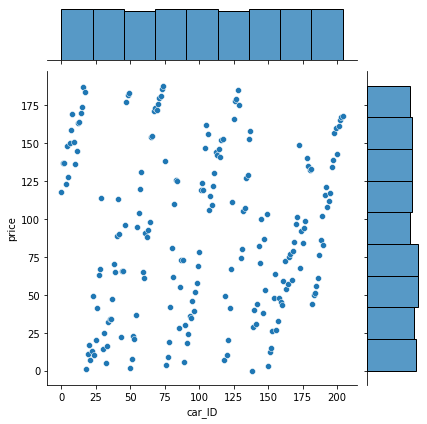

In [15]:
sns.jointplot(x='car_ID',y='price',data= car)

C:\Users\siddu\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\siddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


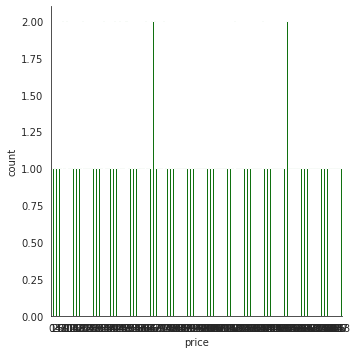

In [16]:
with sns.axes_style('white'):
    g=sns.factorplot("price",data=car, kind="count",color ='green')
    